# buisnes understanding

### buisness vraag:
**wat hebben de apps zonder rating met elkaar gemeen**
***
Met het beantwoorden van deze vraag kunnen we erachter komen wat er bijdraagt aan een app
zonder ratings. Als er een app er er worden geen ratings gegeven door de gebruikers wordt de app
ook niet snel aageraden en snel als onsuccesvol beschouwd. Dit willen we voorkomen door te analyseren
wat de factoren zijn bij onsuccesvolle apps zonder rating.


# Data Understanding

* de dataset die er wordt toegeleverd is een bestand in csv formaat.
* de databron is makkelijk te benaderen vanuit python met behulp van pandas
* de databse bevat 17007 rijen en 18 kolommen
* de volgende kollommen staan in de database
    * `URL`: de url naar de game in de appstore
    * `ID`: unieke id voor de game
    * `name`: naam van de app
    * `subtitle`: alternative naam voor de app
    * `icon url`: url naar de icon van de app
    * `Avegage user rating`: de gemiddelde score van de app op de appstore
    * `Uer rating count`: het aantal ratings dat de app heeft
    * `price`: de aankoop prijs van de app
    * `In-app Purchases`: lijst met prijzen van in-app aankopen
    * `Description`: een omschrijving van de app
    * `Developper`: de uitgever van de app
    * `Age rating`: de aanbevolen minimumleeftijd (4+, 12+ ect.)
    * `Languages`: talen waarin de app beschikbaar is
    * `Size`: de groote van de app in bytes
    * `primary` Genre: de genre van de app (entertainment, strategie, ect.)
    * `Genres`: een lijst met overige genres waar binnen de app valt
    * `Original` realease date: de datum waarop de app werd uitgegeven
    * `current version release date`: de datum van de laatste update



In [164]:
#imports
import pandas as pd
import seaborn as sns

In [165]:
data = pd.read_csv('appstore_games.csv')
data.dtypes

URL                              object
ID                                int64
Name                             object
Subtitle                         object
Icon URL                         object
Average User Rating             float64
User Rating Count               float64
Price                           float64
In-app Purchases                 object
Description                      object
Developer                        object
Age Rating                       object
Languages                        object
Size                            float64
Primary Genre                    object
Genres                           object
Original Release Date            object
Current Version Release Date     object
dtype: object

In [166]:
data.isna().sum()

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

In [167]:
data["Primary Genre"].value_counts()

Games                16286
Education              222
Entertainment          198
Utilities               77
Sports                  60
Reference               32
Stickers                29
Finance                 18
Business                16
Productivity            15
Lifestyle               10
Book                     9
Social Networking        9
News                     7
Health & Fitness         5
Food & Drink             4
Music                    3
Navigation               3
Medical                  2
Travel                   1
Shopping                 1
Name: Primary Genre, dtype: int64

In [168]:
data["Genres"].value_counts()

Games, Strategy, Puzzle                          778
Games, Puzzle, Strategy                          694
Games, Strategy                                  588
Games, Strategy, Action                          483
Games, Simulation, Strategy                      465
                                                ... 
Games, Action, Strategy, Utilities                 1
Games, Travel, Strategy, Word                      1
Games, Finance, Strategy, Puzzle                   1
Games, Simulation, Health & Fitness, Strategy      1
Sports, Racing, Games, Strategy                    1
Name: Genres, Length: 1004, dtype: int64

In [169]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,17007.0,1.059614e+09,2.999676e+08,284921427.0,899654330.0,1.112286e+09,1.286983e+09,1.475077e+09
Average User Rating,7561.0,4.060905e+00,7.514275e-01,1.0,3.5,4.500000e+00,4.500000e+00,5.000000e+00
User Rating Count,7561.0,3.306531e+03,4.232256e+04,5.0,12.0,4.600000e+01,3.090000e+02,3.032734e+06
Price,16983.0,8.134187e-01,7.835732e+00,0.0,0.0,0.000000e+00,0.000000e+00,1.799900e+02
Size,17006.0,1.157064e+08,2.036477e+08,51328.0,22950144.0,5.676895e+07,1.330271e+08,4.005591e+09


# Data Preparation

meer dan de helft van de apps heeft geen rating zoals te zien in de data understanding. 9446 nul waardes op de `average user rating` en `user rating count` van de 17007 totale waardes. alleen in de de rijen waarbij deze kollomen nul waardes hebben zijn we geintreseerd aangezien dit de apps zijn zonder rating.

In [170]:
#drop de id kolomn, deze is niet nodig
data = data.drop(['ID'], axis=1)
data.shape

(17007, 17)

In [171]:
data.isna().sum()

URL                                 0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

### nul waardes verwijderen en opschonen


In [172]:
data['In-app Purchases'].fillna('0', inplace=True)
data['Subtitle'].fillna('0', inplace=True)
data = data.dropna(subset=['Size', 'Languages', 'Price'])
data.isna().sum()
# data.head()

URL                                0
Name                               0
Subtitle                           0
Icon URL                           0
Average User Rating             9386
User Rating Count               9386
Price                              0
In-app Purchases                   0
Description                        0
Developer                          0
Age Rating                         0
Languages                          0
Size                               0
Primary Genre                      0
Genres                             0
Original Release Date              0
Current Version Release Date       0
dtype: int64

### strings naar datum converteren
***
dit doen we zodat tijdreeks analyses mogelijk worden

In [173]:
data['Original Release Date'] = pd.to_datetime(data['Original Release Date'], infer_datetime_format=True)
data['Current Version Release Date'] = pd.to_datetime(data['Current Version Release Date'], infer_datetime_format=True)
data.dtypes

e:\windesheim\data science\jupyter\club analyse\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23/07/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
e:\windesheim\data science\jupyter\club analyse\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/07/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
e:\windesheim\data science\jupyter\club analyse\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30/07/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
e:\windesheim\data science\jupyter\club analyse\lib\site-packages\pandas\core\tools\datetim

URL                                     object
Name                                    object
Subtitle                                object
Icon URL                                object
Average User Rating                    float64
User Rating Count                      float64
Price                                  float64
In-app Purchases                        object
Description                             object
Developer                               object
Age Rating                              object
Languages                               object
Size                                   float64
Primary Genre                           object
Genres                                  object
Original Release Date           datetime64[ns]
Current Version Release Date    datetime64[ns]
dtype: object

In [174]:
data["Primary Genre"] = data["Primary Genre"].astype('category')

data["Age Rating"] = data["Age Rating"].astype('category')

data.dtypes

URL                                     object
Name                                    object
Subtitle                                object
Icon URL                                object
Average User Rating                    float64
User Rating Count                      float64
Price                                  float64
In-app Purchases                        object
Description                             object
Developer                               object
Age Rating                            category
Languages                               object
Size                                   float64
Primary Genre                         category
Genres                                  object
Original Release Date           datetime64[ns]
Current Version Release Date    datetime64[ns]
dtype: object

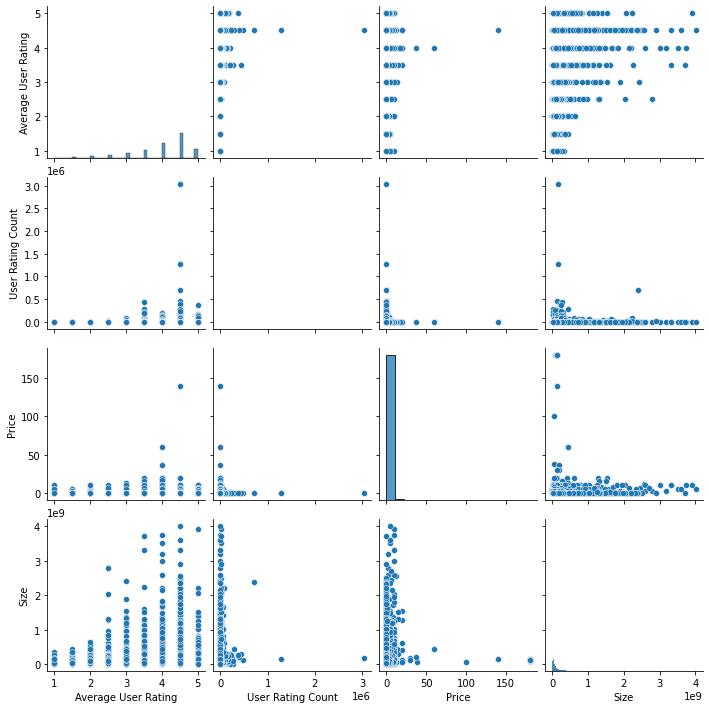

In [175]:
sns.pairplot(data=data)

## feature engineering
***
in de volgende paar blokken worden extra velden toegevoegd die extra inzichten kunnen geven in de relevante apps.
deze velden zijn gebaseerd op de waarde van de andere kolommen.

### weinig relevante plots
we zien hierboven dat er weinig relevante plots te vinden zijn, dit komt door dat veel van de belangrijke waardes worden opgeslagen als string (type object) en deze kunnen niet geanalyseerd worden voordat we er numerieke waardes aangeven. bijvoorbeeld description lengte in plaats van description zelf.

In [176]:
data['description_length'] = data['Description'].str.count(' ') + 1

data.head()

,URL,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,description_length
0,https://apps.apple.com/us/app/sudoku/id284921427,Sudoku,0,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,0,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,263
1,https://apps.apple.com/us/app/reversi/id284926400,Reversi,0,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,0,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",2008-11-07,2018-05-17,204
2,https://apps.apple.com/us/app/morocco/id284946595,Morocco,0,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,0,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",2008-11-07,2017-09-05,97
3,https://apps.apple.com/us/app/sudoku-free/id28...,Sudoku (Free),0,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,0,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,272
4,https://apps.apple.com/us/app/senet-deluxe/id2...,Senet Deluxe,0,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,0,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,365


### aantal games per developper

In [177]:
temp = data['Developer'].value_counts()
tempDict = temp.to_dict()
data['aantal games gerealesed'] = data['Developer'].map(tempDict)
data.head()

,URL,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,description_length,aantal games gerealesed
0,https://apps.apple.com/us/app/sudoku/id284921427,Sudoku,0,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,0,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,263,10
1,https://apps.apple.com/us/app/reversi/id284926400,Reversi,0,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,0,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",2008-11-07,2018-05-17,204,1
2,https://apps.apple.com/us/app/morocco/id284946595,Morocco,0,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,0,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",2008-11-07,2017-09-05,97,2
3,https://apps.apple.com/us/app/sudoku-free/id28...,Sudoku (Free),0,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,0,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,272,10
4,https://apps.apple.com/us/app/senet-deluxe/id2...,Senet Deluxe,0,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,0,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,365,1


### lifetime games toevoegen
life time van realease tot laatste update en realease sinds nu

In [178]:
data["release_year"] = data["Original Release Date"].dt.year
data["lifetime"] = data["Current Version Release Date"] - data["Original Release Date"]
data.head()

,URL,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,...,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,description_length,aantal games gerealesed,release_year,lifetime
0,https://apps.apple.com/us/app/sudoku/id284921427,Sudoku,0,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,0,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,...,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,263,10,2008,3126 days
1,https://apps.apple.com/us/app/reversi/id284926400,Reversi,0,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,0,"The classic game of Reversi, also known as Oth...",Kiss The Machine,...,EN,12328960.0,Games,"Games, Strategy, Board",2008-11-07,2018-05-17,204,1,2008,3478 days
2,https://apps.apple.com/us/app/morocco/id284946595,Morocco,0,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,0,Play the classic strategy game Othello (also k...,Bayou Games,...,EN,674816.0,Games,"Games, Board, Strategy",2008-11-07,2017-09-05,97,2,2008,3224 days
3,https://apps.apple.com/us/app/sudoku-free/id28...,Sudoku (Free),0,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,0,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,...,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,272,10,2008,3233 days
4,https://apps.apple.com/us/app/senet-deluxe/id2...,Senet Deluxe,0,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,0,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,...,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,365,1,2008,3656 days


In [179]:
data.shape

(16923, 21)

### life time developpers toevoegen
mischien zitten daar correlaties in

In [180]:
def GetTimeOfDeveloper(column, first):
    groupedperdev = data.sort_values(column).set_index("Developer").groupby("Developer")[column]
    startofdev = groupedperdev.unique().map(lambda x : x[first]).to_dict()
    return data["Developer"].map(startofdev)



data["StartOfDev"] = GetTimeOfDeveloper("Original Release Date", 0)
data["EndOfDev"] = GetTimeOfDeveloper("Current Version Release Date", -1)
data["DeveloperLifetime"] = data["EndOfDev"] - data["StartOfDev"]
data.head(5)

,URL,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,...,Genres,Original Release Date,Current Version Release Date,description_length,aantal games gerealesed,release_year,lifetime,StartOfDev,EndOfDev,DeveloperLifetime
0,https://apps.apple.com/us/app/sudoku/id284921427,Sudoku,0,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,0,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,...,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,263,10,2008,3126 days,2008-07-23,2017-05-31,3234 days
1,https://apps.apple.com/us/app/reversi/id284926400,Reversi,0,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,0,"The classic game of Reversi, also known as Oth...",Kiss The Machine,...,"Games, Strategy, Board",2008-11-07,2018-05-17,204,1,2008,3478 days,2008-11-07,2018-05-17,3478 days
2,https://apps.apple.com/us/app/morocco/id284946595,Morocco,0,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,0,Play the classic strategy game Othello (also k...,Bayou Games,...,"Games, Board, Strategy",2008-11-07,2017-09-05,97,2,2008,3224 days,2008-11-07,2017-09-05,3224 days
3,https://apps.apple.com/us/app/sudoku-free/id28...,Sudoku (Free),0,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,0,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,...,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,272,10,2008,3233 days,2008-07-23,2017-05-31,3234 days
4,https://apps.apple.com/us/app/senet-deluxe/id2...,Senet Deluxe,0,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,0,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,...,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,365,1,2008,3656 days,2008-07-18,2018-07-22,3656 days


In [181]:
#sns.pairplot(data=data, kind='reg')

Error in callback <function flush_figures at 0x0000025F906375E0> (for post_execute):


KeyboardInterrupt: 

## exploritory data analyse
klein kijkje in de data nemen met plots om te kijken of we patronen herkennen

In [182]:
## verschil apps met en zonder revieuws

In [186]:
data['hasRating'] = ~data['Average User Rating'].isna()
data['hasRating'].value_counts()


False    9386
True     7537
Name: hasRating, dtype: int64

In [184]:
data.columns

Index(['URL', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date',
       'description_length', 'aantal games gerealesed', 'release_year',
       'lifetime', 'StartOfDev', 'EndOfDev', 'DeveloperLifetime'],
      dtype='object')

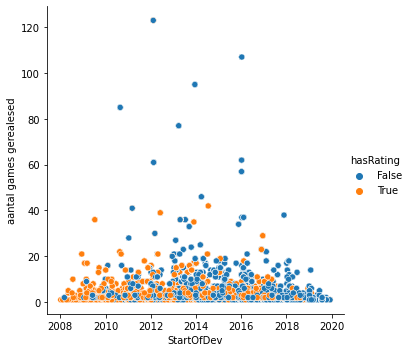

In [188]:
sns.relplot(data=data, hue='hasRating', x='StartOfDev', y='aantal games gerealesed')